# Actividad 3 EL4106 por Joaquin Zepeda

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random

#Generamos el conjunto de datos con 100 muestras cada 1
# media y desvio estandar
mu1, sigma1 = -1, 1
datos1 = np.random.normal(mu1, sigma1, 100) #creando muestra de datos <class 'numpy.ndarray'> (100,)

mu2, sigma2 = 1, 1
datos2 = np.random.normal(mu2, sigma2, 100) #creando muestra de datos <class 'numpy.ndarray'> (100,)

In [36]:
datos=[]
for dato in datos1:
    datos.append((dato,0))

for dato in datos2:
    datos.append((dato,1))

random.shuffle(datos)
#print(datos)

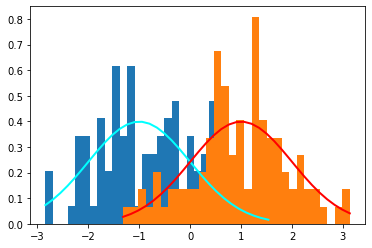

In [39]:
count, bins, ignored = plt.hist(datos1, 30, density=True)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ),
         linewidth=2, color='cyan')
count, bins, ignored = plt.hist(datos2, 30, density=True)
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='r')
plt.show()


In [40]:
def salida(s):
    #print("valor de s",s)
    y = 1/(1+np.exp(s))
    return y
def entropia_cruzada(t,y):
    return -t*np.ln(y)-(1-t)*np.ln(1-y)

In [41]:

b0 = 0.4 #b al comienzo es igual a 0.4
w0=-0.1 #w al comienzo es igual a -0.1
def regla_aprendizaje(datos, learning_rate, n_iteraciones=1):  
    global b0,w0
    b0 = 0.4 #b al comienzo es igual a 0.4
    w0=-0.1 #w al comienzo es igual a -0.1
    #t=target
    suma_w0=0
    suma_b0=0
    n=0
    while n_iteraciones>0:
        for x,t in datos:
            #print(x,t)
            argumento= -(w0*x+b0)
            #print("argumento n°"+str(n_iteraciones),argumento)
            y=salida(argumento)
            if y==1:
                print("error, division por cero")
            #print("y",y)
            suma_w0+=learning_rate*(-t*y*np.exp(argumento)*x + (1-t)*y**2*np.exp(argumento)*x/(1-y))
            suma_b0+=learning_rate*(-t*y*np.exp(argumento) + (1-t)*y**2*np.exp(argumento)/(1-y))
        promedio_w0 = suma_w0/len(datos)
        promedio_b0 = suma_b0/len(datos)

        w0 = w0 - promedio_w0
        b0 = b0 - promedio_b0
        if n%20==0:
            print(f"iteración N°{n} de w0, b0",w0,b0)
        n_iteraciones-=1
        n+=1

    return w0,b0

In [42]:
#obtenemos los valores de los pesos y el bias arreglados por el algoritmo
w1,b1 = regla_aprendizaje(datos,0.01,100)
print("Despues del entrenamineto, los valores obtenidos de w0,b0 son respectivamente: ",w0,b0,"\n")

iteración N°0 de w0, b0 -0.09433571313517562 0.3989980800122853
iteración N°20 de w0, b0 0.9854142893089043 0.2009462705837726
iteración N°40 de w0, b0 2.769055670953061 -0.100098051876106
iteración N°60 de w0, b0 4.477281421176315 -0.287497509535055
iteración N°80 de w0, b0 5.9667685848780065 -0.32022701848797636
Despues del entrenamineto, los valores obtenidos de w0,b0 son respectivamente:  7.1431114426859645 -0.2183810797722588 



In [43]:
print("procedo a hacer una revisión de los datos obtenidos (ojo que es posible encontrar errores y/o outlayers)")
for i in range(5):
    x,t=datos[i]
    print(f"Prueba N°{i} dato,target",x,t)
    argumento= -(w0*x+b0)
    #print("argumento n°"+str(n_iteraciones),argumento)
    y=salida(argumento)
    print("resultado",y)

procedo a hacer una revisión de los datos obtenidos (ojo que es posible encontrar errores y/o outlayers)
Prueba N°0 dato,target 2.1732131778372983 1
resultado 0.9999997745399969
Prueba N°1 dato,target -1.508510174096251 0
resultado 1.6804662663444968e-05
Prueba N°2 dato,target 0.4194861741791588 1
resultado 0.9414783957130924
Prueba N°3 dato,target 1.0212012987962078 1
resultado 0.9991557131457509
Prueba N°4 dato,target -0.7956541316513459 0
resultado 0.0027269870497119274


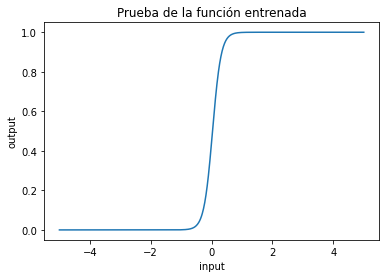

In [46]:
base = np.linspace(-5,5,1000)
y = salida(-(w0*base+b0))
plt.title("Prueba de la función entrenada")
plt.xlabel("input")
plt.ylabel("output")
plt.plot(base,y)
plt.show()